In [1]:
from skimage import data
import numpy as np
from glob import glob
import imageio
import re
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
volunteerId = 27
images = sorted(glob("../../data/7T/scaled_images/*/{}*.png".format(volunteerId)))
masks = sorted(glob("../../data/7T/scaled_masks/*/{}*.png".format(volunteerId)))
preds = sorted(glob("../../data/7T/preds/doubleTransferLearn/*/{}*.png".format(volunteerId)))

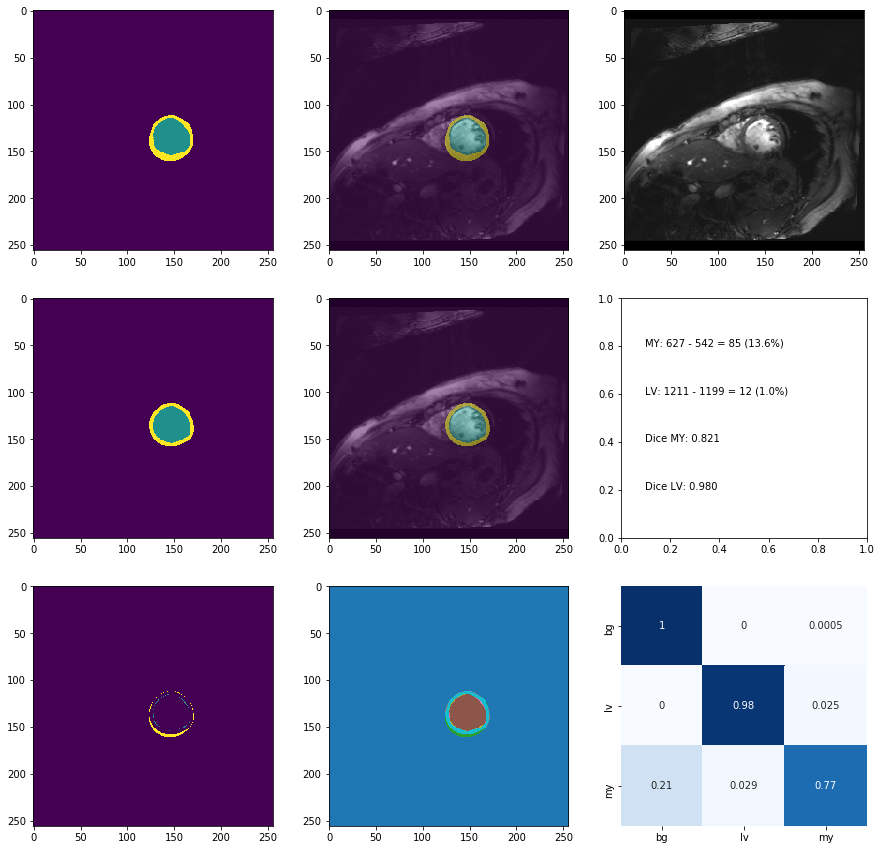

In [4]:
imgs = [imageio.imread(x) for x in [images[100], masks[100], preds[100]]]
fig, axs = plt.subplots(3,3, figsize=(15,15))
axs[0,0].imshow(imgs[1])
axs[0,1].imshow(imgs[0])
axs[0,1].imshow(imgs[1], alpha=.5)
axs[0,2].imshow(imgs[0])
axs[1,0].imshow(imgs[2])
axs[1,1].imshow(imgs[0])
axs[1,1].imshow(imgs[2], alpha=.5)
#axs[1,2].imshow(imgs[0])
cm = np.zeros((3, 3), dtype=int)
np.add.at(cm, (imgs[1], imgs[2]), 1)
lv1_total = cm.sum(axis=1)[1]
lv2_total = cm.sum(axis=0)[1]
my1_total = cm.sum(axis=1)[2]
my2_total = cm.sum(axis=0)[2]
dice_lv = 2*cm[1,1]/(lv1_total+lv2_total)
dice_my = 2*cm[2,2]/(my1_total+my2_total)
axs[1,2].text(0.1,0.2,"Dice LV: {:.3f}".format(dice_lv))
axs[1,2].text(0.1,0.4,"Dice MY: {:.3f}".format(dice_my))
axs[1,2].text(0.1,0.6,"LV: {} - {} = {} ({:.1f}%)".format(lv1_total,lv2_total,lv1_total-lv2_total,100*(lv1_total-lv2_total)/lv1_total))
axs[1,2].text(0.1,0.8,"MY: {} - {} = {} ({:.1f}%)".format(my1_total,my2_total,my1_total-my2_total,100*(my1_total-my2_total)/my1_total))
axs[2,0].imshow(abs(imgs[1]-imgs[2].astype(np.int8)))
axs[2,1].imshow(imgs[1] + (imgs[2])*3, cmap="tab10")
cm = cm/cm.sum(axis=1,keepdims=True)
cm = pd.DataFrame(cm, columns=["bg","lv","my"],index=["bg","lv","my"])
sn.heatmap(cm, annot=True, cbar=False, cmap="Blues")
fig

In [ ]:
def plot_orig_pred_diff(original, truth, prediction, crop=56):
    imgs = [imageio.imread(x) for x in [original, truth, prediction]]
    width,height,_ = imgs[0].shape
    imgs = [x[crop:width-crop,crop:height-crop] for x in imgs]
    fig, axs = plt.subplots(1, 3, figsize=(16,16), )
    [ax.axis('off') for ax in axs]
    axs[0].imshow(imgs[0])
    axs[1].imshow(imgs[0])
    axs[1].imshow(imgs[2], alpha=.5)
    axs[2].imshow(imgs[0])
    cm = np.zeros((3, 3), dtype=int)
    np.add.at(cm, (imgs[1], imgs[2]), 1)
    lv1_total = cm.sum(axis=1)[1]
    lv2_total = cm.sum(axis=0)[1]
    my1_total = cm.sum(axis=1)[2]
    my2_total = cm.sum(axis=0)[2]
    dice_lv = 2*cm[1,1]/(lv1_total+lv2_total)
    dice_my = 2*cm[2,2]/(my1_total+my2_total)
    axs[2].text(10,10,"Dice LV: {:.3f}".format(dice_lv),color="white",size="20")
    axs[2].text(10,30,"Dice MY: {:.3f}".format(dice_my),color="white",size="20")
    axs[2].imshow(abs(imgs[1]-imgs[2].astype(np.int8)),alpha=.5)
    plt.subplots_adjust(wspace=.05)

In [6]:
def get_files(Id, sliceNum, frameNum):
    template = "../../data/7T/{}/*/"+"{}_slice{:03d}_frame{:03d}-*.png".format(Id, sliceNum, frameNum)
    return [glob(template.format(x))[0] for x in ["scaled_images","scaled_masks","preds/doubleTransferLearn"]]

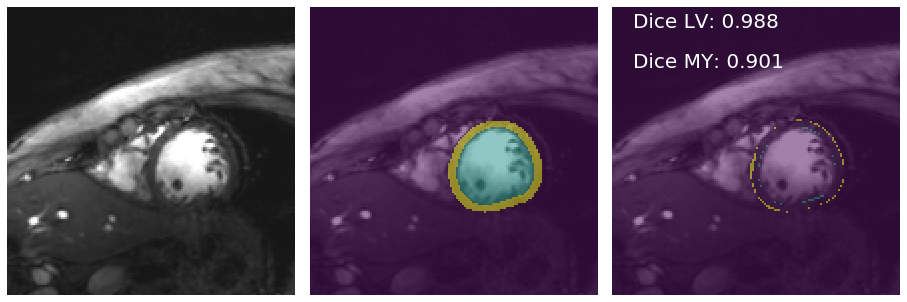

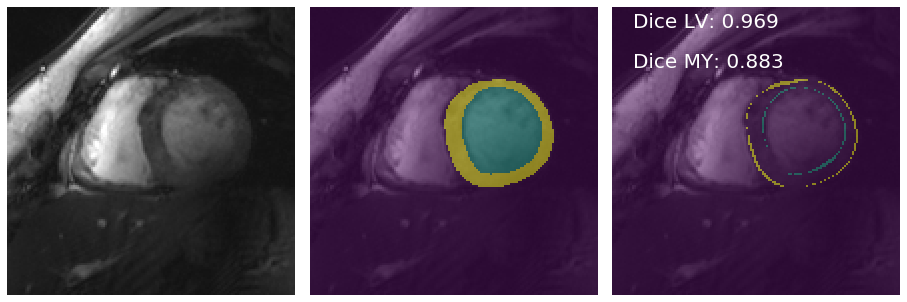

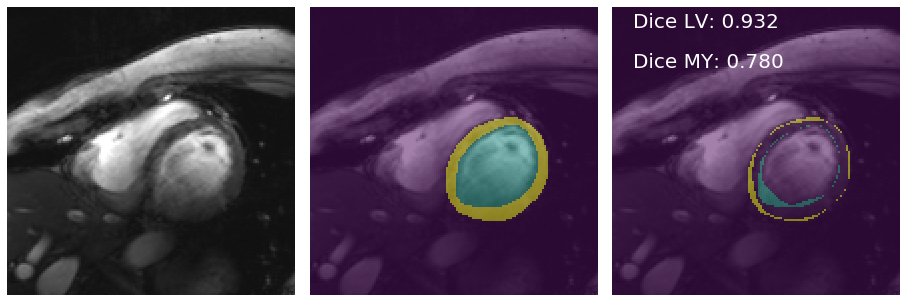

In [7]:
plot_orig_pred_diff(*get_files(27,5,12))
plot_orig_pred_diff(*get_files(26,10,14))
plot_orig_pred_diff(*get_files(27,10,10))

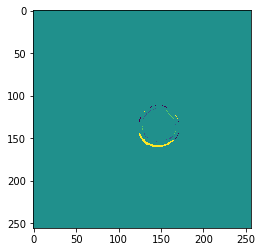

In [8]:
plt.imshow((imgs[1]-imgs[2].astype(np.int8)))

In [9]:
def plot_orig_pred(original, truth, prediction, crop=56):
    imgs = [imageio.imread(x) for x in [original, truth, prediction]]
    width,height,_ = imgs[0].shape
    imgs = [x[crop:width-crop,crop:height-crop] for x in imgs]
    fig, axs = plt.subplots(1, 2, figsize=(16,16), )
    [ax.axis('off') for ax in axs]
    axs[0].imshow(imgs[0])
    axs[1].imshow(imgs[0])
    axs[1].imshow(imgs[2], alpha=.5)
    cm = np.zeros((3, 3), dtype=int)
    np.add.at(cm, (imgs[1], imgs[2]), 1)
    lv1_total = cm.sum(axis=1)[1]
    lv2_total = cm.sum(axis=0)[1]
    my1_total = cm.sum(axis=1)[2]
    my2_total = cm.sum(axis=0)[2]
    dice_lv = 2*cm[1,1]/(lv1_total+lv2_total)
    dice_my = 2*cm[2,2]/(my1_total+my2_total)
    axs[1].text(5,10,"Dice LV: {:.3f}".format(dice_lv),color="white",size="20")
    axs[1].text(5,20,"Dice MY: {:.3f}".format(dice_my),color="white",size="20")
    plt.subplots_adjust(wspace=.05)

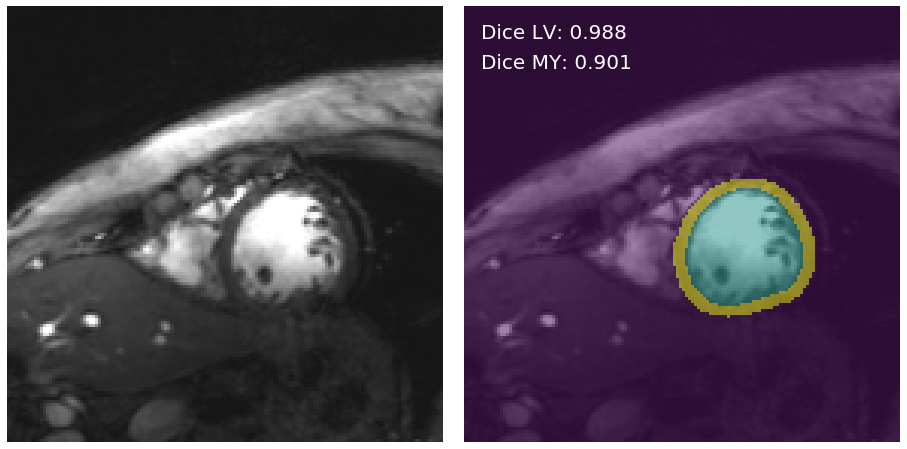

In [10]:
plot_orig_pred(*get_files(27,5,12))

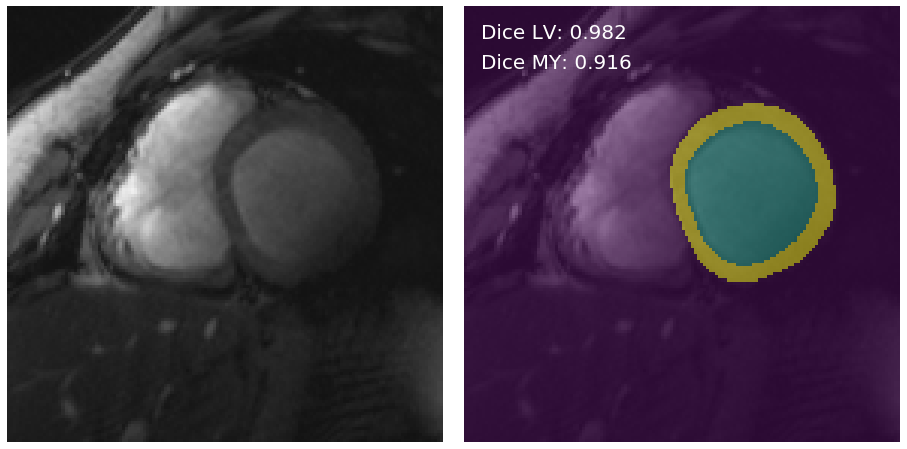

In [11]:
plot_orig_pred(*get_files(26,13,19))

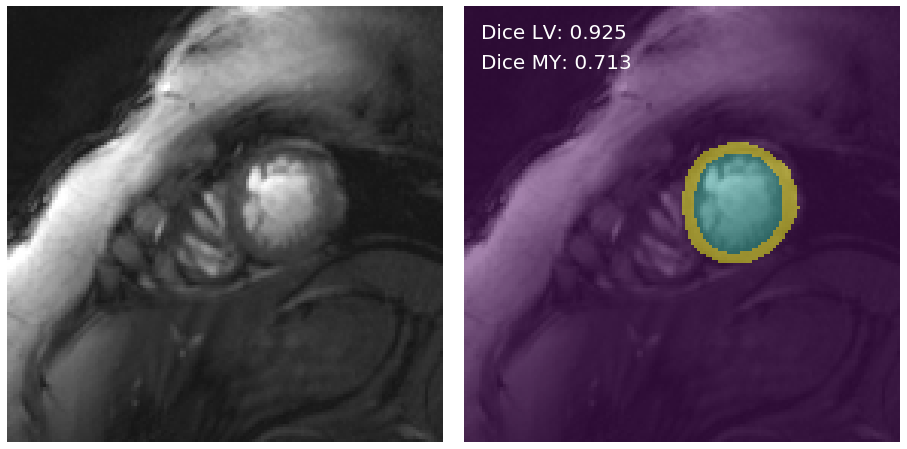

In [12]:
plot_orig_pred(*get_files(26,2,2))